<a href="https://colab.research.google.com/github/Cralzatec/SenalesSistemas/blob/main/Cuaderno1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la programación - Señales y Sistemas

- ## [Librería numpy](https://numpy.org/) (señales digitales discretas)

- ## [Librería sympy](https://www.sympy.org/es/) (emular señales continuas)

In [162]:
import numpy as np # importar libreria numpy
x = 30 #tipo int
y = 36.5 #tipo float

print(type(x),type(y)) #imprimir en pantalla

<class 'int'> <class 'float'>


# Arreglo de datos en numpy

- Señales en continuo

  $x(t) \in \mathbb{R}, \mathbb{C}$

  $t \in \mathbb{R}$

- Señales discretas

  $x[t_k] \in \mathbb{R}, \mathbb{C}$  

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

- Señales digitales

  $x[t_k] \in \{x_0,x_1,\dots,x_{P-1}\};$ $P\in \mathbb{N}$ estados según cantidad de bits del sistema de proceso

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

In [163]:
xv = np.array([0,-2.5,10]) #crear array tipo vector
xv

array([ 0. , -2.5, 10. ])

# Listas vs numpy array

- Las listas pueden contener, números, strings, y en general objetos

- Los array de numpy están pensados para procesar números (matrices, tensores).

In [164]:
xl = [0,-2,0.5] # no es señal digital -> lista de números
xl

[0, -2, 0.5]

In [165]:
xl = ['andres marino',0.5, 2] #lista de tres elementos con un string, un flotante y un entero
xl

['andres marino', 0.5, 2]

# Tamaños, indexación y graficar numpy array

In [166]:
xv.shape # vector con 3 elementos - > shape retorna la forma (tamaño del arreglo)

(3,)

In [167]:
xm = np.array([[0,-2.5,10,4],[6,47,70,2],[8,10.2,-698,-0.9]]) #cada lista de números es tratada como una fila de la matriz
xm

array([[   0. ,   -2.5,   10. ,    4. ],
       [   6. ,   47. ,   70. ,    2. ],
       [   8. ,   10.2, -698. ,   -0.9]])

In [168]:
xm.shape

(3, 4)

# En python se indexa desde 0

In [169]:
xv = np.array([-6,5,4.2,3,8,50,16])
print(xv,xv.shape,xv[0])

[-6.   5.   4.2  3.   8.  50.  16. ] (7,) -6.0


# En Python, cuando se indexa por rangos de valores, no se incluye el último elemento

x[t_i,t_f)

In [170]:
xv[1:5] # x[t_0] # no se incluye el elemento 5 que equivale a x[5] = 50

array([5. , 4.2, 3. , 8. ])

*Cuando se piden todos los elementos hasta el final con el operador : si se incluye el último elemento*

In [171]:
# desde el segundo elemento hasta el ultimo
print(xv)
print(xv[1:])

[-6.   5.   4.2  3.   8.  50.  16. ]
[ 5.   4.2  3.   8.  50.  16. ]


In [172]:
#desde antes del tercer elmento hasta el principio
print(xv)
print(xv[:3])

[-6.   5.   4.2  3.   8.  50.  16. ]
[-6.   5.   4.2]


# Para matrices se extiende la misma sintaxis para indexar vectores, pero separando la indexación por filas y por columnas

In [173]:
print(xm)

[[   0.    -2.5   10.     4. ]
 [   6.    47.    70.     2. ]
 [   8.    10.2 -698.    -0.9]]


In [174]:
xm[0:2,:2]

array([[ 0. , -2.5],
       [ 6. , 47. ]])

In [175]:
xm[0:2,0]

array([0., 6.])

In [176]:
xm[0,1:]

array([-2.5, 10. ,  4. ])

In [177]:
np.diag(xm)#diagonal del arreglo (matriz)

array([   0.,   47., -698.])

# Simular cero y pendiente  para acondicionamiento de señales

- Se generará una función para emular el proceso de cero y pendiente en el acondicionamiento de señales.

- Las funciones principales para generar vectores equiespaciados son [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [range](https://www.w3schools.com/python/ref_func_range.asp) y [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [178]:
# crear vector tiempo por rango y por número de muestras
K = 200 # número de muestras
ti = -15 # tiempo incial referencia [s]
tf = 10 # tieimpo final  [s]
# vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)
print(tv)
print(tv.shape)
# tiempo muestreo se define según el rango de trabajo en segundos y la cantidad de muestras
Ts = 1/500         #(tf - ti)/K
print(Ts)

[-15.         -14.87437186 -14.74874372 -14.62311558 -14.49748744
 -14.3718593  -14.24623116 -14.12060302 -13.99497487 -13.86934673
 -13.74371859 -13.61809045 -13.49246231 -13.36683417 -13.24120603
 -13.11557789 -12.98994975 -12.86432161 -12.73869347 -12.61306533
 -12.48743719 -12.36180905 -12.2361809  -12.11055276 -11.98492462
 -11.85929648 -11.73366834 -11.6080402  -11.48241206 -11.35678392
 -11.23115578 -11.10552764 -10.9798995  -10.85427136 -10.72864322
 -10.60301508 -10.47738693 -10.35175879 -10.22613065 -10.10050251
  -9.97487437  -9.84924623  -9.72361809  -9.59798995  -9.47236181
  -9.34673367  -9.22110553  -9.09547739  -8.96984925  -8.84422111
  -8.71859296  -8.59296482  -8.46733668  -8.34170854  -8.2160804
  -8.09045226  -7.96482412  -7.83919598  -7.71356784  -7.5879397
  -7.46231156  -7.33668342  -7.21105528  -7.08542714  -6.95979899
  -6.83417085  -6.70854271  -6.58291457  -6.45728643  -6.33165829
  -6.20603015  -6.08040201  -5.95477387  -5.82914573  -5.70351759
  -5.5778894

- Supongamos la función cuadrática:

$x(t) = a t^2 + b;$

$\forall t \in [t_i,t_f]$

- Se pretende generar el proceso de discretización según:

$x[t_k] = a t_k^2 + b$





In [179]:
#parámetros parabola
#a = 4
#b = -3
xv = np.cos(tv/2) + np.cos(tv/4) # creamos parabola en tiempo discreto-> **  pontencia
print(xv)
print(xv.shape)

[-4.73924040e-01 -4.33270228e-01 -3.93386563e-01 -3.54479807e-01
 -3.16750373e-01 -2.80391494e-01 -2.45588409e-01 -2.12517596e-01
 -1.81346038e-01 -1.52230525e-01 -1.25317005e-01 -1.00739976e-01
 -7.86219290e-02 -5.90728371e-02 -4.21897021e-02 -2.80561509e-02
 -1.67420891e-02 -8.30341130e-03 -2.78176950e-03 -2.04400533e-04
 -5.84013306e-04 -3.91873615e-03 -1.01921246e-02 -1.93732293e-02
 -3.14167246e-02 -4.62630961e-02 -6.38388869e-02 -8.40570027e-02
 -1.06817072e-01 -1.32005864e-01 -1.59497756e-01 -1.89155257e-01
 -2.20829576e-01 -2.54361244e-01 -2.89580774e-01 -3.26309367e-01
 -3.64359657e-01 -4.03536492e-01 -4.43637748e-01 -4.84455173e-01
 -5.25775257e-01 -5.67380129e-01 -6.09048465e-01 -6.50556425e-01
 -6.91678586e-01 -7.32188901e-01 -7.71861644e-01 -8.10472375e-01
 -8.47798883e-01 -8.83622139e-01 -9.17727228e-01 -9.49904267e-01
 -9.79949311e-01 -1.00766523e+00 -1.03286257e+00 -1.05536036e+00
 -1.07498695e+00 -1.09158071e+00 -1.10499081e+00 -1.11507784e+00
 -1.12171450e+00 -1.12478

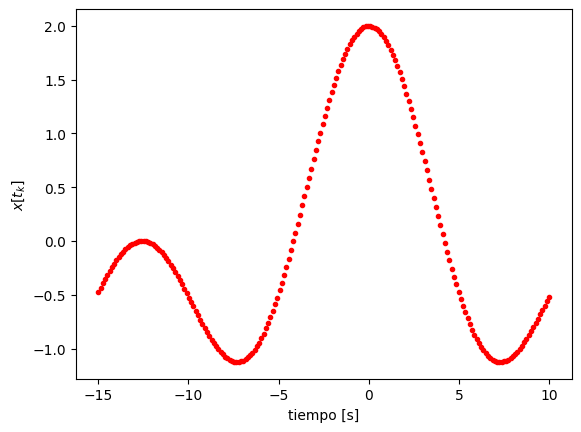

In [180]:
import matplotlib.pyplot as plt #librería para gráficas básicas en python

plt.plot(tv,xv,'r.') #vector en eje horizontal, vector eje vertical, color y marcador
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$') # $ $ ecuación latex
plt.show() #mostrar gráfica

## Cálculo de pendiente y del offset (cero)

$$ y[t_k] \in [y_{min},y_{max}]$$

$$y[t_k] = m x[t_k] + c$$

$$m = \frac{y_{max}-y_{min}}{x_{max}-x_{min}}$$

$$c = y[t_k] - m x[t_k]$$

- Se crea un código tipo función bajo el ambiente def, para generar el cero y pendiente según los valores $y_{max}$ y $y_{min}$ definidos por el usuario.

In [181]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -3.3, ymax = 3.3): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [182]:
yv = my_ceropen(xv,ymin=-3.3,ymax=3.3) #se llama la función definida en la celda anterior

In [183]:
print(yv)
print(yv.shape)

[-1.92511153 -1.83923396 -1.75498326 -1.67279619 -1.59309611 -1.51629121
 -1.44277278 -1.37291362 -1.30706647 -1.24556253 -1.18871011 -1.13679332
 -1.09007091 -1.04877519 -1.01311106 -0.98325519 -0.95935524 -0.94152928
 -0.9298653  -0.92442084 -0.92522274 -0.93226704 -0.94551902 -0.96491329
 -0.9903541  -1.02171575 -1.05884304 -1.10155202 -1.14963065 -1.20283973
 -1.26091392 -1.32356275 -1.39047194 -1.46130461 -1.53570275 -1.61328864
 -1.6936665  -1.77642409 -1.86113443 -1.94735762 -2.03464263 -2.12252923
 -2.21054989 -2.29823177 -2.38509869 -2.47067313 -2.55447828 -2.63604002
 -2.71488896 -2.79056241 -2.86260638 -2.93057752 -2.99404501 -3.05259243
 -3.10581957 -3.15334416 -3.19480359 -3.22985644 -3.25818407 -3.27949203
 -3.29351139 -3.3        -3.29874362 -3.28955695 -3.27228456 -3.24680168
 -3.2130149  -3.1708627  -3.12031591 -3.06137801 -2.9940853  -2.91850697
 -2.83474501 -2.74293398 -2.64324074 -2.53586388 -2.42103323 -2.29900909
 -2.17008138 -2.03456876 -1.89281745 -1.74520017 -1

- Se grafican la señal original y la señal acondicionada mediante [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

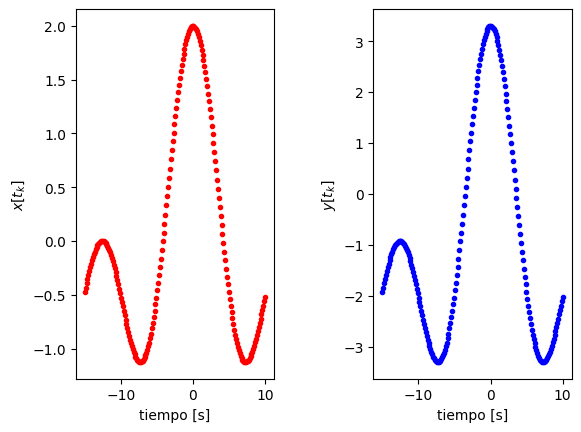

In [184]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()

Text(0, 0.5, '$x[t_k]$')

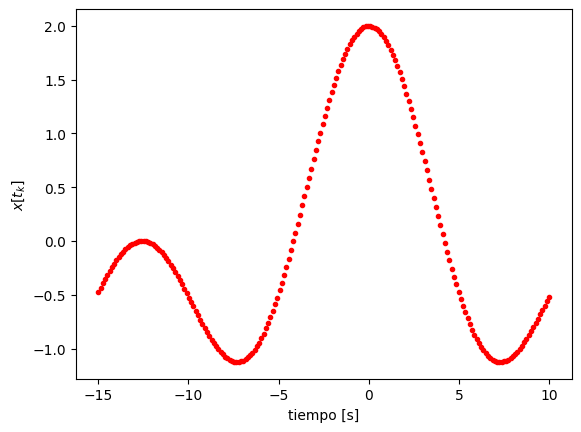

In [185]:
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

Text(0, 0.5, '$y[t_k]$')

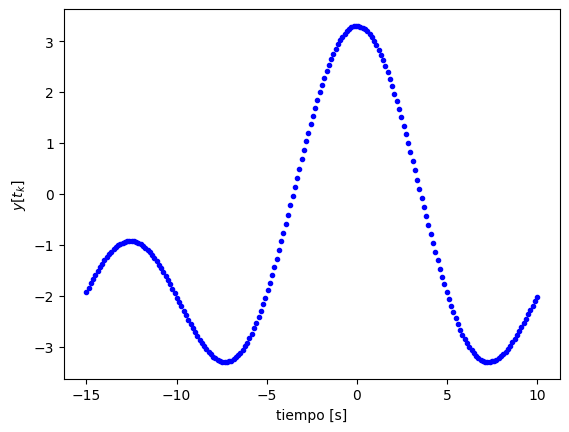

In [186]:
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')



























- Se ilustra nuevamente el proceso de acondicionamiento cero y pendiente utilizando una función seno:

$$x[t_k] = A \sin[w_o t + \phi]$$

$$x[t_k] = A \sin[2 \pi F_o t] = A \sin[2 \pi t / T_o ]$$



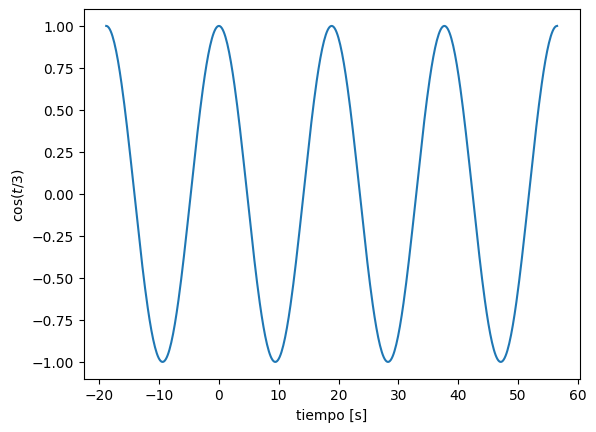

In [187]:
#Ejemplo clase periodo 1
K = 500 # número de muestras
T_1 = 6*np.pi # periodo función sin
A = 1 # amplitud
ti = -T_1 #tiempo inicial
tf = 3*T_1 #tiempo final
w1=2*np.pi/T_1
tv = np.linspace(ti,tf,num=K) #vector de datos en tiempo
xv = A * np.cos(w1*tv) #vector de amplitud

plt.plot(tv,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('$\cos(t/3)$')
plt.show()

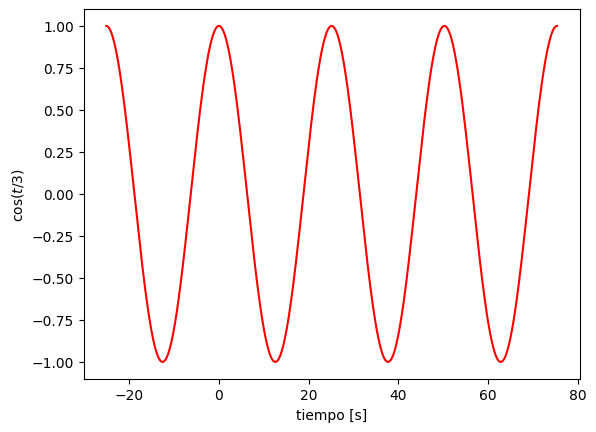

In [188]:
#Ejemplo clase periodo 2
K = 500 # número de muestras
T_2 = 8*np.pi # periodo función sin
A = 1 # amplitud
ti = -T_2 #tiempo inicial
tf = 3*T_2 #tiempo final
w2=2*np.pi/T_2
tv = np.linspace(ti,tf,num=K) #vector de datos en tiempo
xv = A * np.cos(w2*tv) #vector de amplitud

plt.plot(tv,xv,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('$\cos(t/3)$')
plt.show()

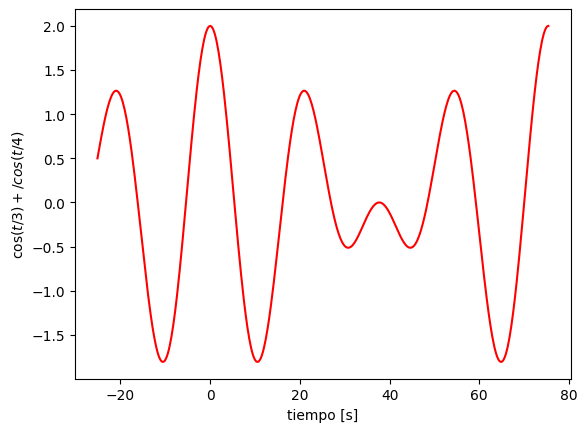

In [189]:
yv= A*np.cos(w1*tv)+ A*np.cos(w2*tv)

plt.plot(tv,yv,'r')
plt.xlabel('tiempo [s]')
plt.ylabel('$\cos(t/3)+/cos(t/4)$')
plt.show()

In [190]:
yv = my_ceropen(xv,ymin=0,ymax=5) #se utiliza la función ya creada de cero y pendiente

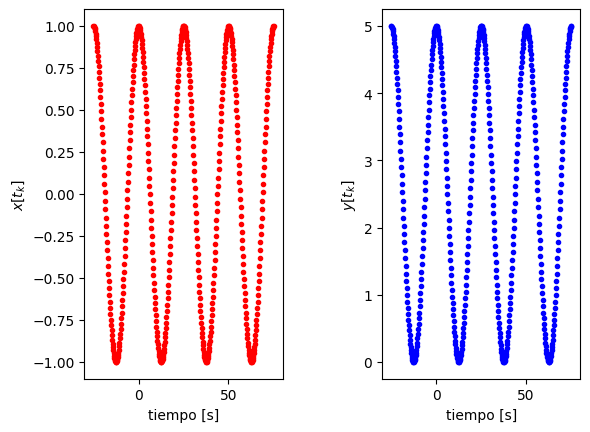

In [191]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Ejercicio:

- Después de acondicionar las señales ilustradas en el presente cuaderno, simule un proceso de discretización con $F_s \geq 2 F_o.$ Dibuje el resultado de la señal discretizada utilizando la función [stem](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.stem.html).

- Consultar el funcionamiento de los métodos [cdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) y [argmin](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html).

- Realice una función mediante el ambiente def que permita realizar los procesos de discretización y cuantización (usando cdist y argmin) en cascada para un conversor análogo-digital de 3 bits con entrada análoga de 0 a 10 [v]. Presente las gráficas de la señal original, señal con cero y pendiente, señal discretizada, y señal digital.

**Ayuda para el ejercicio**: a continuación se presenta el funcionamiento de las funciones cdist y argmin

In [192]:
#Ejemplo de señal despues de cero y pendiente y discretización
#Recuerde que el proceso de discretización debe ser implementado
from scipy.spatial.distance import cdist

#señal original
Fo = 60
To = 1/60
A = 120
Fs = 10*Fo #asegurar nyquist
Ts = 1/Fs
tv = np.arange(0,2*To,Ts)#procesar dos periodos discretizados
y = A*np.sin(2*np.pi*Fo*tv)

#cero y pendiente
ycs = my_ceropen(y, ymin=0,ymax=10)

#número de bits y vector de cuantización
nbits = 3
rmin = 0
rmax = 10
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#distancias y cero pendiente a vector cuantizacion
d = cdist(ycs.reshape(-1,1),ve.reshape(-1,1)) #se utiliza reshape(-1,1) para generar vectores columna como lo pide cdist
d.shape # d es una matriz de 500 x 8, ej: la fila 1 incluye la distancia euclidea entre y[0] y los 8 elementos en ve

(20, 8)

In [193]:
#se requiere identificar el elemento ve[j] más cercano a y[i] para genera señal cuantizada
ind = np.argmin(d,axis=1) #el parámetro axis = 1 indica que busca la posición a lo largo de las columnas del elemento más pequeño en cada fila
ind

array([3, 6, 7, 7, 6, 4, 1, 0, 0, 1, 3, 6, 7, 7, 6, 4, 1, 0, 0, 1])

In [194]:
print(ycs[1],ind[1],ve[ind[1]]) # para y[50] = 0.58, el estado más cercano en ve es el elemento 1 que corresponde a ve[1]=0.71

8.090169943749473 6 8.571428571428571


Podemos crear una función de cuantización y evaluarla punto a punto a partir de cada muestra después de cero y spam discretizada

In [195]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [196]:
#recorrer vector cero y spam discretizado para cuantizar

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

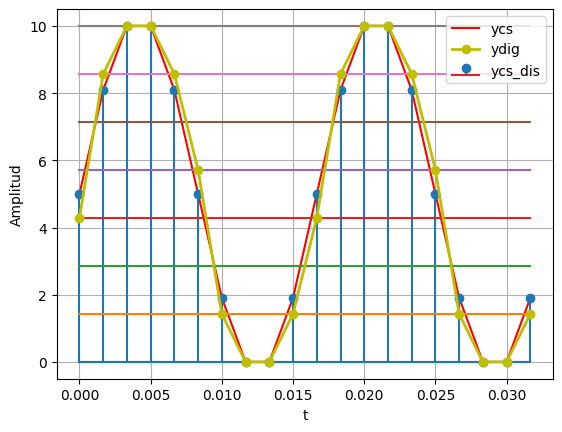

In [197]:
#graficar señales

plt.plot(tv,ycs,c='r', label='ycs')#cs continua

plt.stem(tv,ycs, label='ycs_dis')#cs discreta

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))

# graficar señal Digital (discreta + cuantizada)

plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2)

plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

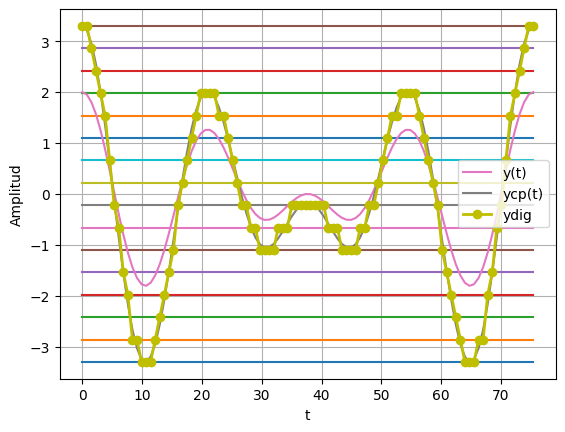

In [214]:
#Ejemplo clase periodo 1
T_1 = 6*np.pi # Cos 1
T_2 = 8*np.pi # Cos 2
A = 1 # amplitud
ti = 0 #tiempo inicial
tf = 4*T_1 #tiempo final
w1=2*np.pi/T_1
w2=2*np.pi/T_2
F_s = 100 #asegurar nyquist
T_s = 1/F_s
tv = np.linspace(ti,tf,F_s) #vector de datos en tiempo
y = A*np.cos(w1*tv)+ A*np.cos(w2*tv)

#Cero y pendiente
ymin=-3.3
ymax=3.3
nbits = 4
ycs = my_ceropen(y,ymin=ymin,ymax=ymax)
ve = np.linspace(ymin,ymax,2**nbits)

for i in range(ycs.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(ycs[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(ycs[i],ve)) #apilar datos cuantizando si i>0

#estados de cuantización

for v in ve:
  plt.plot(tv,v*np.ones(len(tv)))#estados de cuantización

plt.plot(tv,y,label='y(t)') #continua
plt.plot(tv,ycs,label='ycp(t)') #discreta cero y pendiente
plt.plot(tv,yq,c='y',marker='o',label='ydig', linewidth=2) #cuantizada + discreta = digital
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()